# Logistic Regression
---

In this notebook, we dive deep into the details of the logistic regression. We will also learn about regularization and interpreting the model output.

## Logistic Regreesion and Regularization

Regularization penalties **the large values** of the model coefficients. By that it overcomes the possibilty of the model suffering from **overfitting**. In the `LogisticRegression` class, there is a hyperparameter `C`, which corresponds to the ***inverse*** of the **regularization strenght**. So,

* Larger `C` means less regularization thus larger coefficients
* Smaller `C` means higher regularization thus smaller coefficients

c:\users\u\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


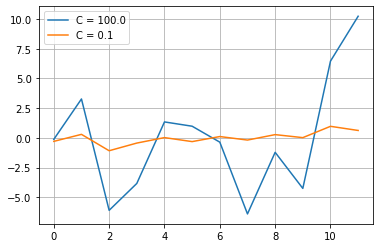

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


lr_no_reg = LogisticRegression(C = 100.0)
lr_reg = LogisticRegression(C = 0.1)

lr_no_reg.fit(X_train, y_train)
lr_reg.fit(X_train, y_train)

plt.figure()
plt.plot(lr_no_reg.coef_.ravel(), label = "C = 100.0")
plt.plot(lr_reg.coef_.ravel(), label = "C = 0.1")
plt.grid()
plt.legend()

What happens is that the regularization is added as term in the logistic regression loss function to be the following,

$$\text{regularized loss = original loss + large coefficient penalty}$$

With no regularization, the loss only focuses on the training accuracy, thus maximizes it. While with regularization, the loss wants to minimize both the missclassification loss and at the same time have small coefficients, so you will probably find the **training** accuracy of the regularized model is less than the unregularized model.

In [117]:
lr_reg.score(X_train, y_train), lr_no_reg.score(X_train, y_train)

(0.9583333333333334, 0.9666666666666667)

But if we look at the accuracy of test set. You will likely to find that the regularized model gives better accuracy thatn 

In [118]:
lr_reg.score(X_test, y_test), lr_no_reg.score(X_test, y_test)

(0.9666666666666667, 0.9333333333333333)

There are two types of regularization:

* Lasso (L1 regularization) where the term added to the loss function is $\boxed{\alpha * \sum_{i=1}^{n}|a_i|}$
* Ridge (L2 regularization) where the term added to the loss function is $\boxed{\alpha * \sum_{i=1}^{n}a_i^2}$

Both are used for regularization. And Lasso is used for feature selection (check the regression notebook in the 01 - Supervised Learning with scikit-learn directory).

We can specify the type of regularization in `LogisticRegression` using `penalty` argument `'l1'` for lasso and `'l2'` for ridge (which is the default).

c:\users\u\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


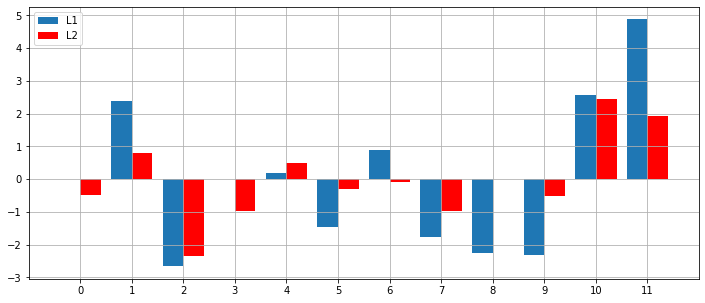

In [143]:
import numpy as np

lr_l1 = LogisticRegression(penalty='l1', solver="liblinear")
lr_l2 = LogisticRegression(penalty='l2')

lr_l1.fit(X_train, y_train)
lr_l2.fit(X_train, y_train)

plt.figure(figsize=(12, 5))
x_axis = np.arange(len(lr_l1.coef_.ravel()))
plt.bar(x_axis - 0.2, lr_l1.coef_.ravel(), width = 0.4, label = "L1")
plt.bar(x_axis + 0.2, lr_l2.coef_.ravel(), width = 0.4, label = "L2", color = "r")
plt.xticks(x_axis, ["{}".format(x) for x in x_axis])
plt.grid()
plt.legend()

We can see that lasso (L1) makes a lot of coefficients equal to 0 (ignoring these features) so it is used for feautre selection. While ridge minimizes them but not setting them to 0.

## Logistic Regression and Probilities

In [229]:
def make_meshgrid(X, y, step = 0.02):
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    return xx, yy

def plot_contours(ax, classifier, xx, yy, **params_kwargs):
    z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] # get the probability of class-1
    z = z.reshape(xx.shape)
    out = ax.contourf(xx, yy, z, **params_kwargs)
    return out

In [230]:
from sklearn.datasets import load_breast_cancer

X = load_breast_cancer().data[:, :2]
y = load_breast_cancer().target

In [231]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [232]:
xx, yy = make_meshgrid(X[:, 0], X[:, 1])

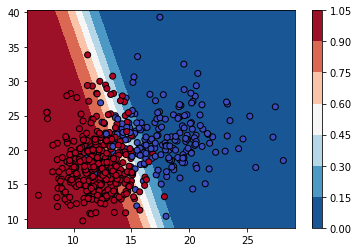

In [245]:
fig, ax = plt.subplots()
x0, x1 = X[:, 0], X[:, 1]
out = plot_contours(ax, lr, xx, yy, cmap="RdBu_r")
ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, edgecolors="black")
fig.colorbar(out)

For this figure, the plot is filled with the probablity of the class 1. Blue represent that the probablity is less than 0.5 and red is for over 0.5. The logistic regression takes the raw output model comming from the decision boundary and get the probability using the **sigmoid function**.

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [246]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

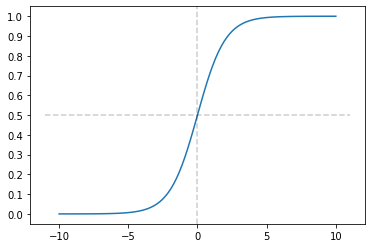

In [265]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.axvline(x=0, color = "k", linestyle="--", alpha = 0.2)
plt.hlines(y = 0.5, xmin=-11, xmax=11, color = "k", linestyles="--", alpha = 0.2)
plt.yticks(np.arange(0, 1.1, 0.1));

The sigmoid function outputs a probability greater than 0.5 if the input to the sigmoid (raw model output) is positive, and vice versa.

For binary classification, if the output of the sigmoid function (final model output) is greater than 0.5 predict class 1, and if less than 0.5, predict class 0.

## Multi-class Logistic Regression

If the target has more than 2 class, this is a multi-class classification problems. As most of our talk is about the binary classification, we can do the following for the multi-class tasks:

1. Create a binary classifier (using sigmoid) with one-vs-rest approach

In one-vs-rest, we train a binary classifier for each class of the target where for every classifier, the target class of that classifier becomes class-1 (positive class) and other than that is class 0. For a target of 3 classes, we fit three classifiers for each of the three classes.

```py
lr_class0.fit(X, y==0)
lr_class1.fit(X, y==1)
lr_class2.fit(X, y==2)
```

To get the final output, we take the positive class of the classifier that returns the **largest** raw output value.

We can get the raw output value through the method `decision_function`.

In [267]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
print("The number of classes is {}".format(len(np.unique(y))))

The number of classes is 3


In [268]:
lr_class0 = LogisticRegression()
lr_class1 = LogisticRegression()
lr_class2 = LogisticRegression()

lr_class0.fit(X, y==0)
lr_class1.fit(X, y==1)
lr_class2.fit(X, y==2)

LogisticRegression()

In [270]:
print(lr_class0.decision_function(X)[0]) # get the decision function output (raw output) from the first example
print(lr_class1.decision_function(X)[0])
print(lr_class2.decision_function(X)[0])

4.1231645773006464
-2.05814819013127
-13.65294998632556


The decision function gives largest raw output for classifier 0, so we predict that the first example is for class 0.

In [271]:
y[0]

0

`sklearn` by default handles the multi-class tasks using one-vs-rest approach.

In [273]:
lr_multi_class = LogisticRegression()
lr_multi_class.fit(X, y)
lr_multi_class.predict(X[0].reshape(1, -1))

c:\users\u\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0])

2. We can change the activation function instead of sigmoid to be softmax

Here we use one classifier and output different raw outputs for each example for each class. The sigmoid function output probability of each class $k$ (let's say of $K$ classes) using the following formula,

$$ \text{softmax}(x) = [\text{softmax}_1(x), \text{softmax}_1(x), \cdots, \text{softmax}_K(x)]$$
$$ \text{softmax}_k(x) = P(y = k|x) = \frac{e^{w_k * x + b_k}}{\sum_{i = 1}^K e^{w_i * x + b_i}} $$

where $w_k$ and $b_i$ is the set of coefficients and intercept assigned to class $k$. This comes with pros and cons.

<img src = "assets/images/one-vs-rest" height = "700" width = "700">

When using logistic regression for multi-class classification, a number of coefficients of **the number of target classes multiplied by the number of features** is calculated in form of matrix. The number of intercepts is the **number of target classes**. This is valid for both one-vs-rest and softmax classification.

In [275]:
lr_ovr = LogisticRegression()
lr_ovr.fit(X, y)

c:\users\u\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [276]:
print("Coefficient size: {}\n{}".format(lr_ovr.coef_.shape, lr_ovr.coef_))

Coefficient size: (3, 4)
[[-0.4193722   0.96745346 -2.52061278 -1.0843117 ]
 [ 0.53145055 -0.3149938  -0.20086391 -0.94793033]
 [-0.11207835 -0.65245966  2.72147669  2.03224203]]


To specify the softmax classification for logistic regression, we specify the hyperparameter `multi_class` to be `multinomial`.

In [285]:
lr_multinomial = LogisticRegression(multi_class = "multinomial")
lr_multinomial.fit(X, y)

c:\users\u\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [286]:
print("Coefficient size: {}\n{}".format(lr_multinomial.coef_.shape, lr_multinomial.coef_))

Coefficient size: (3, 4)
[[-0.4193722   0.96745346 -2.52061278 -1.0843117 ]
 [ 0.53145055 -0.3149938  -0.20086391 -0.94793033]
 [-0.11207835 -0.65245966  2.72147669  2.03224203]]
